<a href="https://colab.research.google.com/github/gorilla15a/property-valuation-multimodal/blob/main/notebooks/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding Extraction

In [ ]:
!git clone https://github.com/gorilla15a/property-valuation-multimodal.git

Cloning into 'property-valuation-multimodal'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 105 (delta 36), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (105/105), 4.25 MiB | 3.73 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [ ]:
%cd property-valuation-multimodal

/content/property-valuation-multimodal/property-valuation-multimodal/property-valuation-multimodal


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv("data/processed/train_eda.csv")
test= pd.read_csv("data/processed/test_eda.csv")

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import os

class PropertyImageDataset(Dataset):
    def __init__(self, df, image_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.image_dir, f"{row['id']}.png")

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, row["id"]


In [ ]:
from torchvision import transforms

image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [ ]:
import torchvision.models as models
import torch.nn as nn

resnet = models.resnet18(pretrained=True)

# Remove final classification layer
resnet.fc = nn.Identity()

resnet.eval()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 123MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights

weights = ResNet18_Weights.DEFAULT
resnet = resnet18(weights=weights)
resnet.fc = nn.Identity()
resnet.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch

dummy = torch.randn(1, 3, 224, 224)
out = resnet(dummy)

print(out.shape)


torch.Size([1, 512])


In [ ]:
IMAGE_DIR = "/content/drive/MyDrive/property_valuation_mapbox/images/train"

In [ ]:
from torch.utils.data import DataLoader

train_img_dataset = PropertyImageDataset(
    train,
    IMAGE_DIR,
    transform=image_transform
)

train_img_loader = DataLoader(
    train_img_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2
)


In [ ]:
torch.cuda.is_available()

False

In [ ]:
TRAIN_IMAGE_DIR = "/content/drive/MyDrive/property_valuation_mapbox/images/train"
TEST_IMAGE_DIR  = "/content/drive/MyDrive/property_valuation_mapbox/images/test"

In [ ]:
train["id"] = train["id"].astype(int)
test["id"]  = test["id"].astype(int)

In [ ]:
def extract_embeddings(df, image_dir, model, batch_size=32):
    dataset = PropertyImageDataset(df, image_dir, image_transform)

    loader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2
    )

    all_embeddings = []
    all_ids = []

    model.eval()

    with torch.no_grad():
        for images, ids in tqdm(
            loader,
            desc=f"Extracting embeddings from {os.path.basename(image_dir)}",
            total=len(loader)
        ):
            feats = model(images)          # CPU forward pass
            all_embeddings.append(feats.numpy())
            all_ids.extend(ids.numpy())

    X = np.vstack(all_embeddings)

    emb_df = pd.DataFrame(X)
    emb_df["id"] = all_ids

    return emb_df

In [ ]:
train_img_emb = extract_embeddings(
    df=train,
    image_dir=TRAIN_IMAGE_DIR,
    model=resnet,
    batch_size=32
)

print("Train embeddings shape:", train_img_emb.shape)

Extracting embeddings from train: 100%|██████████| 507/507 [59:02<00:00,  6.99s/it]

Train embeddings shape: (16209, 513)


In [ ]:
train_img_emb.to_csv(
    "data/processed/train_image_embeddings.csv",
    index=False
)

In [ ]:
test_img_emb = extract_embeddings(
    df=test,
    image_dir=TEST_IMAGE_DIR,
    model=resnet,
    batch_size=32
)

print("Test embeddings shape:", test_img_emb.shape)


Extracting embeddings from test: 100%|██████████| 169/169 [18:10<00:00,  6.46s/it]

Test embeddings shape: (5404, 513)


In [ ]:
test_img_emb.to_csv(
    "data/processed/test_image_embeddings.csv",
    index=False
)

# Model Training

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset



In [ ]:
# Tabular data AFTER EDA & feature engineering
train_tab = pd.read_csv("data/processed/train_eda.csv")
test_tab  = pd.read_csv("data/processed/test_eda (2).csv")

# Image embeddings
train_img_emb = pd.read_csv("data/processed/train_image_embeddings.csv")
test_img_emb  = pd.read_csv("data/processed/test_image_embeddings.csv")

print("Train tabular:", train_tab.shape)
print("Test tabular :", test_tab.shape)
print("Train image emb:", train_img_emb.shape)
print("Test image emb :", test_img_emb.shape)


Train tabular: (16209, 23)
Test tabular : (5404, 21)
Train image emb: (16209, 513)
Test image emb : (5404, 513)


In [ ]:
import os
processed_dir = "data/processed"
print(f"Contents of '{processed_dir}':")
if os.path.exists(processed_dir):
    for item in os.listdir(processed_dir):
        print(item)
else:
    print(f"Directory '{processed_dir}' does not exist.")

Contents of 'data/processed':
.gitkeep
test_eda.csv
train_image_embeddings.csv
test_eda (2).csv
train_eda.csv
test_image_embeddings.csv


In [ ]:
from google.colab import files

print("Please upload 'train_image_embeddings.csv' and 'test_image_embeddings.csv'")
uploaded = files.upload()

In [ ]:
# Ensure exactly ONE embedding per ID
train_img_emb = train_img_emb.drop_duplicates(subset="id")
test_img_emb  = test_img_emb.drop_duplicates(subset="id")

assert train_img_emb["id"].duplicated().sum() == 0
assert test_img_emb["id"].duplicated().sum() == 0

print("Clean train image emb:", train_img_emb.shape)
print("Clean test image emb :", test_img_emb.shape)

Clean train image emb: (16110, 513)
Clean test image emb : (5396, 513)


In [ ]:
train_tab = train_tab.drop_duplicates(subset="id")
test_tab = test_tab.drop_duplicates(subset="id")

train_full = train_tab.merge(
    train_img_emb,
    on="id",
    how="inner"
)

test_full = test_tab.merge(
    test_img_emb,
    on="id",
    how="inner"
)

assert train_full["id"].duplicated().sum() == 0
assert test_full["id"].duplicated().sum() == 0

print("Final train_full:", train_full.shape)
print("Final test_full :", test_full.shape)

Final train_full: (16110, 535)
Final test_full : (5396, 533)


In [ ]:
print(
    train_full.shape[0],
    train_tab.shape[0],
    train_img_emb.shape[0]
)


16110 16110 16110


In [ ]:
tabular_features = [
    "sqft_living", "grade", "bathrooms", "bedrooms",
    "condition", "lat", "long", "waterfront",
    "view", "density_proxy", "sqft_living15"
]

non_image_cols = ["id", "price", "log_price"] + tabular_features

image_features = [c for c in train_full.columns if c not in non_image_cols]

print("Tabular features:", len(tabular_features))
print("Image features:", len(image_features))


Tabular features: 11
Image features: 521


In [ ]:
X_tab = train_full[tabular_features].values
X_img = train_full[image_features].values
y     = train_full["log_price"].values

X_tab_test = test_full[tabular_features].values
X_img_test = test_full[image_features].values

assert X_tab.shape[0] == X_img.shape[0] == y.shape[0]

In [ ]:
image_features_correct = [str(c) for c in range(512)] # Assuming 512 embedding dimensions (0 to 511)

# Re-extract X_img and X_img_test using only the correct numerical image features
X_img = train_full[image_features_correct].values
X_img_test = test_full[image_features_correct].values

# Scale image embeddings first
img_scaler = StandardScaler()
X_img_scaled = img_scaler.fit_transform(X_img)
X_img_test_scaled = img_scaler.transform(X_img_test)

# PCA: reduce 512 → 32 or 64
pca = PCA(n_components=150, random_state=42)
X_img_pca = pca.fit_transform(X_img_scaled)
X_img_test_pca = pca.transform(X_img_test_scaled)

print("Image PCA variance:", pca.explained_variance_ratio_.sum())

Image PCA variance: 0.8485796096467262


In [ ]:
tab_scaler = StandardScaler()
X_tab_scaled = tab_scaler.fit_transform(X_tab)
X_tab_test_scaled = tab_scaler.transform(X_tab_test)

In [ ]:
# Tabular-only
X_tab_final = X_tab_scaled

# Multimodal
X_mm_final = np.hstack([X_tab_scaled, X_img_pca])
X_mm_test  = np.hstack([X_tab_test_scaled, X_img_test_pca])

print("Tabular shape:", X_tab_final.shape)
print("Multimodal shape:", X_mm_final.shape)

Tabular shape: (16110, 11)
Multimodal shape: (16110, 161)


In [ ]:
X_tab_tr, X_tab_val, y_tr, y_val = train_test_split(
    X_tab_final, y, test_size=0.2, random_state=42
)

X_mm_tr, X_mm_val, _, _ = train_test_split(
    X_mm_final, y, test_size=0.2, random_state=42
)

In [ ]:
xgb_tab = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_tab.fit(X_tab_tr, y_tr)

pred_val = xgb_tab.predict(X_tab_val)
rmse = np.sqrt(mean_squared_error(y_val, pred_val))
r2   = r2_score(y_val, pred_val)

print("[XGB Tabular] RMSE(log):", rmse)
print("[XGB Tabular] R²:", r2)

[XGB Tabular] RMSE(log): 0.16824710028971895
[XGB Tabular] R²: 0.8988328079087442


In [ ]:
xgb_mm = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_mm.fit(X_mm_tr, y_tr)

pred_val = xgb_mm.predict(X_mm_val)
rmse = np.sqrt(mean_squared_error(y_val, pred_val))
r2   = r2_score(y_val, pred_val)

print("[XGB Multimodal] RMSE(log):", rmse)
print("[XGB Multimodal] R²:", r2)

[XGB Multimodal] RMSE(log): 0.17622228752054137
[XGB Multimodal] R²: 0.8890145137128479


In [ ]:

results = []

def eval_model(name, y_true, y_pred):
    return {
        "Model": name,
        "RMSE(log)": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }
results.append(eval_model("XGB Tabular", y_val, xgb_tab.predict(X_tab_val)))
results.append(eval_model("XGB Multimodal", y_val, xgb_mm.predict(X_mm_val)))

pd.DataFrame(results)


,Model,RMSE(log),R2
0,XGB Tabular,0.168247,0.898833
1,XGB Multimodal,0.176222,0.889015


In [ ]:
final_preds = xgb_mm.predict(X_mm_test)
final_price = np.expm1(final_preds)

submission = pd.DataFrame({
    "id": test_full["id"],
    "predicted_price": final_price
})
submission.to_csv("submission.csv", index=False)

# Grad-Cam Analysis

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=a0b4e9959d7442df6ed784e3f9e6ab2a65695c7effced96665e568cba2e04a9a
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torchvision import models, transforms
from PIL import Image

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [ ]:
model = models.resnet18(pretrained=True)
model.eval()
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
target_layers = [model.layer4[-1]]

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [ ]:
IMAGE_DIR = "/content/drive/MyDrive/property_valuation_mapbox/images/train"

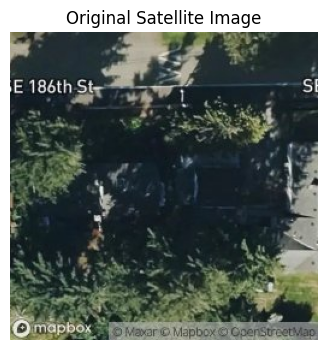

In [ ]:
img_path = "/content/drive/MyDrive/property_valuation_mapbox/images/train/9117000170.png"  # change ID if needed

image = Image.open(img_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

plt.figure(figsize=(4,4))
plt.imshow(image)
plt.axis("off")
plt.title("Original Satellite Image")
plt.show()


In [ ]:
cam = GradCAM(
    model=model,
    target_layers=target_layers
)

In [ ]:
grayscale_cam = cam(
    input_tensor=input_tensor,
    targets=None
)

grayscale_cam = grayscale_cam[0]

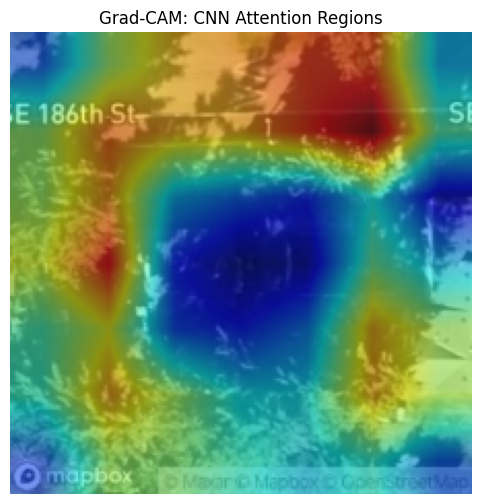

In [ ]:
resize_transform = transforms.Resize((224, 224))
resized_image = resize_transform(image)
rgb_image = np.array(resized_image).astype(np.float32) / 255.0

visualization = show_cam_on_image(
    rgb_image,
    grayscale_cam,
    use_rgb=True
)

plt.figure(figsize=(6,6))
plt.imshow(visualization)
plt.axis("off")
plt.title("Grad-CAM: CNN Attention Regions")
plt.show()

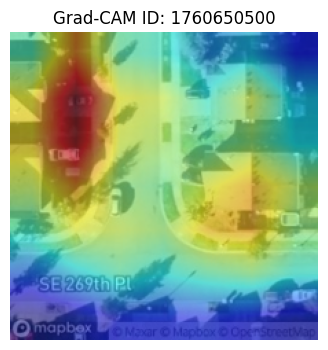

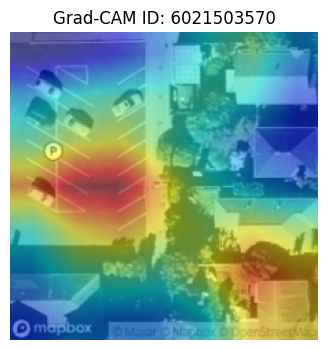

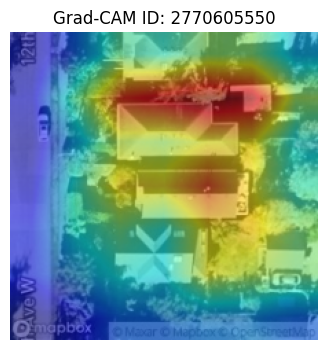

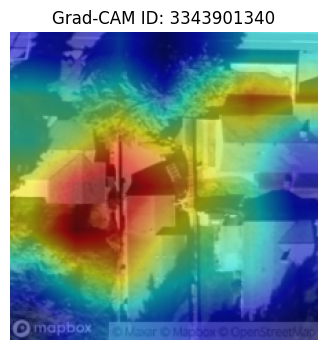

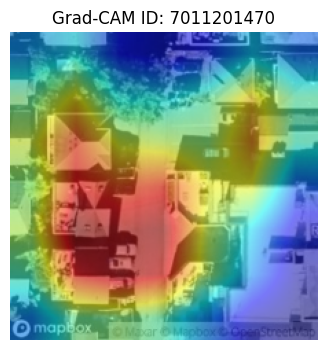

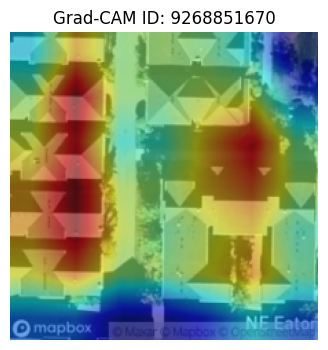

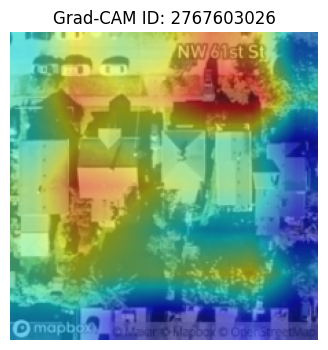

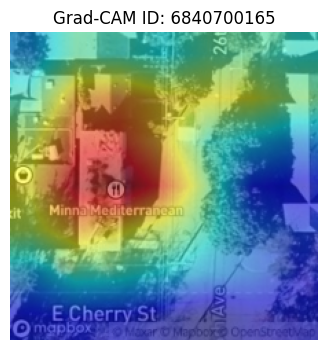

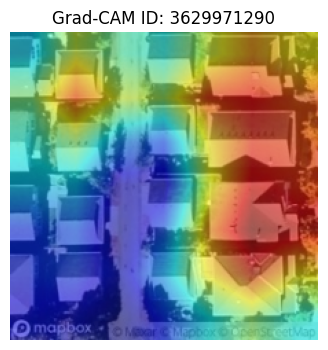

In [ ]:
sample_ids = [
    "1760650500",
    "6021503570",
    "2770605550",
    "3343901340","7011201470","9268851670","2767603026","6840700165","3629971290"
]

for sid in sample_ids:
    path = f"/content/drive/MyDrive/property_valuation_mapbox/images/train/{sid}.png"
    image = Image.open(path).convert("RGB")

    input_tensor = transform(image).unsqueeze(0).to(device)

    cam_map = cam(input_tensor=input_tensor)[0]

    # Resize the image to 224x224 before converting to numpy array for display
    resized_image_for_display = transforms.Resize((224, 224))(image)
    rgb_image = np.array(resized_image_for_display).astype(np.float32) / 255.0

    vis = show_cam_on_image(rgb_image, cam_map, use_rgb=True)

    plt.figure(figsize=(4,4))
    plt.imshow(vis)
    plt.axis("off")
    plt.title(f"Grad-CAM ID: {sid}")
    plt.show()